In [1]:
import os
import numpy as np
import glob
import shutil
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,Flatten,Dropout,MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
_URL = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"

In [3]:
zip_file = tf.keras.utils.get_file(origin=_URL,fname="flower_photos.tgz",extract=True)

228813984/228813984 [==============================] - 278s 1us/step


In [4]:
zip_file

'C:\\Users\\ASUS\\.keras\\datasets\\flower_photos.tgz'

In [5]:
base_dir = os.path.join(os.path.dirname(zip_file),'flower_photos')

In [6]:
base_dir

'C:\\Users\\ASUS\\.keras\\datasets\\flower_photos'

In [7]:
os.listdir('C:\\Users\\ASUS\\.keras\\datasets\\flower_photos')

['daisy', 'dandelion', 'LICENSE.txt', 'roses', 'sunflowers', 'tulips']

In [8]:
classes = ['roses','daisy','dandelion','sunflowers','tulips']

In [9]:
classes

['roses', 'daisy', 'dandelion', 'sunflowers', 'tulips']

In [10]:
for cl in classes:
    img_path = os.path.join(base_dir,cl)
    images = glob.glob(img_path+'/*.jpg')
    print("{}:{} Images".format(cl,len(images)))
    num_train = int(round(len(images)*0.8))
    train,val = images[:num_train],images[num_train:]
    for t in train:
        if not os.path.exists(os.path.join(base_dir,'train',cl)):
            os.makedirs(os.path.join(base_dir,'train',cl))
        shutil.move(t,os.path.join(base_dir,'train',cl))
    for v in val:
        if not os.path.exists(os.path.join(base_dir,'val',cl)):
            os.makedirs(os.path.join(base_dir,'val',cl))
        shutil.move(v,os.path.join(base_dir,'val',cl))

roses:641 Images
daisy:633 Images
dandelion:898 Images
sunflowers:699 Images
tulips:799 Images


In [11]:
round(len(images)*0.8)

639

In [12]:
train_dir = os.path.join(base_dir,'train')
val_dir = os.path.join(base_dir,'val')

In [13]:
train_dir

'C:\\Users\\ASUS\\.keras\\datasets\\flower_photos\\train'

In [14]:
val_dir

'C:\\Users\\ASUS\\.keras\\datasets\\flower_photos\\val'

In [15]:
batch_size = 10
IMG_SHAPE = 150

In [16]:
image_gen = ImageDataGenerator(rescale=1./255,
                               horizontal_flip=True)

In [17]:
train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                              directory=train_dir,
                                              shuffle=True,
                                              target_size=(IMG_SHAPE,IMG_SHAPE)
                                              )

Found 2935 images belonging to 5 classes.


In [18]:
def plotImages(image_arr):
    fig,axes = plt.subplots(1,5,figsize=(20,20))
    axes = axes.flatten()
    for img ,ax in zip(image_arr,axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

In [19]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]

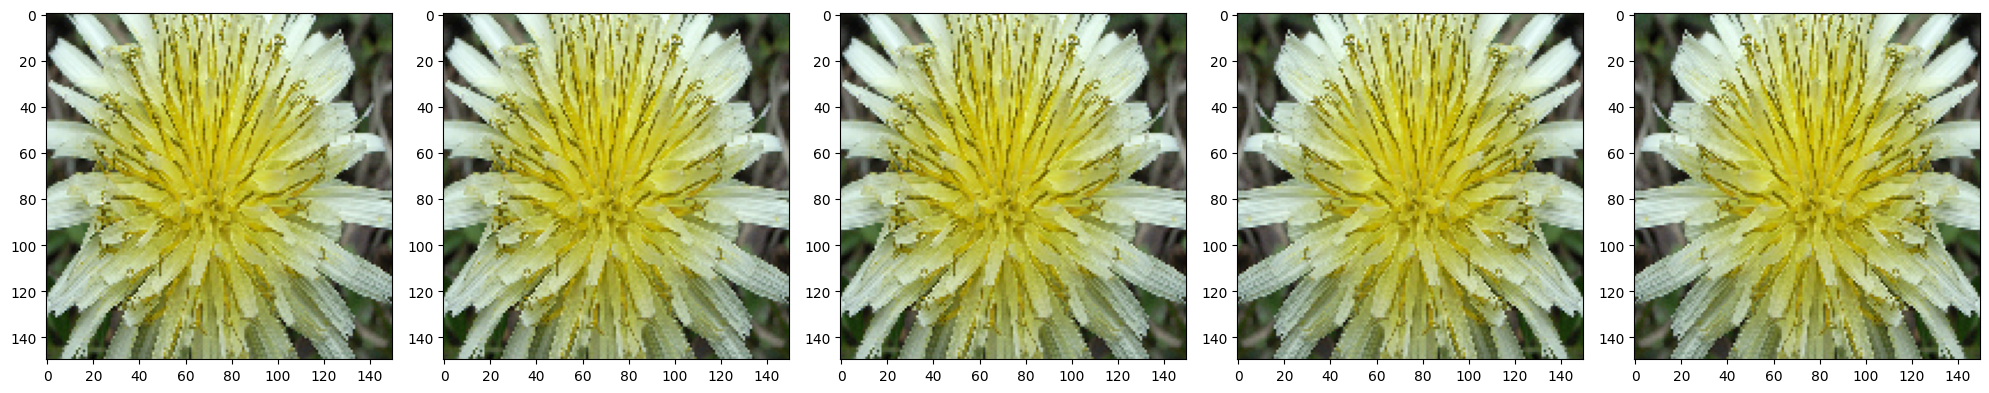

In [20]:
plotImages(augmented_images)

In [21]:
image_gen_train = ImageDataGenerator(rescale=1./255,
                                    rotation_range=45,
                                    width_shift_range=.15,
                                    height_shift_range=.15,
                                    horizontal_flip=True,
                                    zoom_range=0.5
                                    )

In [22]:
train_data_gen = image_gen_train.flow_from_directory(batch_size=batch_size,
                                                    directory=train_dir,
                                                    shuffle=True,
                                                    target_size=(IMG_SHAPE,IMG_SHAPE),
                                                    class_mode='sparse')

Found 2935 images belonging to 5 classes.


In [23]:
image_gen_val = ImageDataGenerator(rescale=1./255)
val_data_gen = image_gen_val.flow_from_directory(batch_size=batch_size,
                                                directory=val_dir,
                                                target_size=(IMG_SHAPE,IMG_SHAPE),
                                                class_mode='sparse')

Found 735 images belonging to 5 classes.


In [24]:
train_data_gen.class_indices

{'daisy': 0, 'dandelion': 1, 'roses': 2, 'sunflowers': 3, 'tulips': 4}

In [25]:
model = Sequential()
model.add(Conv2D(16,3,padding='same',activation='relu',input_shape=(IMG_SHAPE,IMG_SHAPE,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32,3,padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64,3,padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(5))

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 37, 37, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 18, 18, 64)       0

In [27]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [28]:
epochs = 80
history = model.fit(train_data_gen,
                   steps_per_epoch=int(np.ceil(train_data_gen.n/float(batch_size))),
                    epochs=epochs,
                   validation_data=val_data_gen,
                   validation_steps=int(np.ceil(val_data_gen.n/float(batch_size))))

Epoch 1/80
294/294 [==============================] - 84s 283ms/step - loss: 1.2869 - accuracy: 0.4535 - val_loss: 1.0169 - val_accuracy: 0.5878
Epoch 2/80
294/294 [==============================] - 66s 225ms/step - loss: 1.0732 - accuracy: 0.5632 - val_loss: 0.9959 - val_accuracy: 0.6327
Epoch 3/80
294/294 [==============================] - 67s 226ms/step - loss: 0.9759 - accuracy: 0.6024 - val_loss: 0.9336 - val_accuracy: 0.6381
Epoch 4/80
294/294 [==============================] - 67s 226ms/step - loss: 0.9165 - accuracy: 0.6388 - val_loss: 0.8481 - val_accuracy: 0.6803
Epoch 5/80
294/294 [==============================] - 66s 224ms/step - loss: 0.8630 - accuracy: 0.6572 - val_loss: 0.7836 - val_accuracy: 0.7238
Epoch 6/80
294/294 [==============================] - 65s 222ms/step - loss: 0.8670 - accuracy: 0.6579 - val_loss: 0.8907 - val_accuracy: 0.6912
Epoch 7/80
294/294 [==============================] - 66s 225ms/step - loss: 0.8425 - accuracy: 0.6831 - val_loss: 0.7017 - val_ac

294/294 [==============================] - 68s 232ms/step - loss: 0.4703 - accuracy: 0.8242 - val_loss: 0.5737 - val_accuracy: 0.7918
Epoch 58/80
294/294 [==============================] - 69s 233ms/step - loss: 0.4888 - accuracy: 0.8092 - val_loss: 0.6142 - val_accuracy: 0.7986
Epoch 59/80
294/294 [==============================] - 69s 234ms/step - loss: 0.4957 - accuracy: 0.8078 - val_loss: 0.7531 - val_accuracy: 0.7605
Epoch 60/80
294/294 [==============================] - 69s 233ms/step - loss: 0.4875 - accuracy: 0.8194 - val_loss: 0.5719 - val_accuracy: 0.7864
Epoch 61/80
294/294 [==============================] - 69s 233ms/step - loss: 0.4923 - accuracy: 0.8123 - val_loss: 0.6737 - val_accuracy: 0.7687
Epoch 62/80
294/294 [==============================] - 68s 233ms/step - loss: 0.4944 - accuracy: 0.8153 - val_loss: 0.6245 - val_accuracy: 0.7810
Epoch 63/80
294/294 [==============================] - 69s 234ms/step - loss: 0.4791 - accuracy: 0.8174 - val_loss: 0.6172 - val_accurac

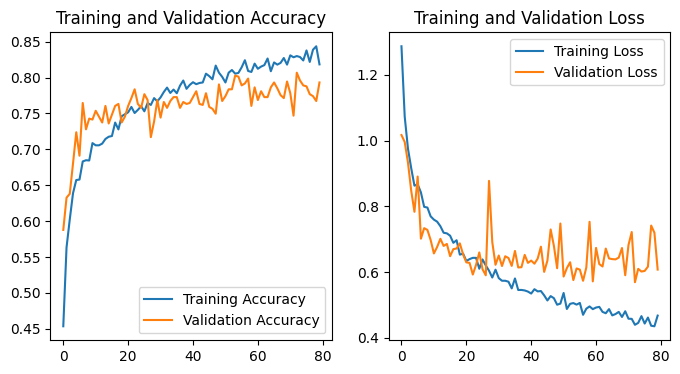

In [29]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()   